Md. Tanvir Jawad<br>ID: 21101221

In [2]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [3]:
from modsim import *

In [4]:
params = Params(mass = 0.0025,diameter = 0.019,rho = 1.2,g = 9.8,v_init = 0,v_term = 18,height = 381,t_end = 30,)

In [5]:
from numpy import pi

def make_system(params):
    init = State(y=params.height, v=params.v_init)

    area = pi * (params.diameter/2)**2

    C_d = (2 * params.mass * params.g /
           (params.rho * area * params.v_term**2))

    return System(init=init,
                  area=area,
                  C_d=C_d,
                  mass=params.mass,
                  rho=params.rho,
                  g=params.g,
                  t_end=params.t_end)

In [6]:
system = make_system(params)

In [7]:
system.C_d

0.4445009981135434

In [8]:
params2 = params.set(v_term=20)

In [9]:
system2 = make_system(params2)
system2.C_d

0.3600458084719701

In [10]:
def slope_func(t, state, system):
    y, v = state
    rho, C_d, area = system.rho, system.C_d, system.area
    mass, g = system.mass, system.g

    f_drag = rho * v**2 * C_d * area / 2
    a_drag = f_drag / mass

    dydt = v
    dvdt = -g + a_drag

    return dydt, dvdt

In [11]:
slope_func(0, system.init, system)

(0, -9.8)

In [12]:
def event_func(t, state, system):
    y, v = state
    return y

In [13]:
results, details = run_solve_ivp(system, slope_func,
                                 events=event_func)
details.message

'A termination event occurred.'

In [14]:
results.tail()

,y,v
21.541886,1.614743e+01,-18.001510
21.766281,1.211265e+01,-18.006240
21.990676,8.076745e+00,-18.009752
22.215070,4.039275e+00,-18.011553
22.439465,2.131628e-14,-18.011383


In [15]:
t_sidewalk = results.index[-1]
t_sidewalk

22.439465058044306

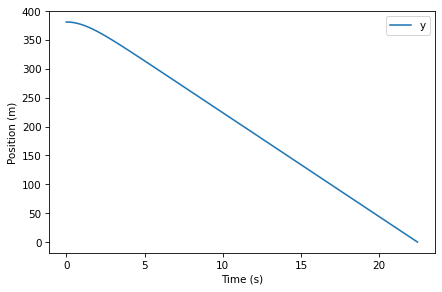

In [16]:
def plot_position(results):
    results.y.plot()

    decorate(xlabel='Time (s)',
         ylabel='Position (m)')

plot_position(results)

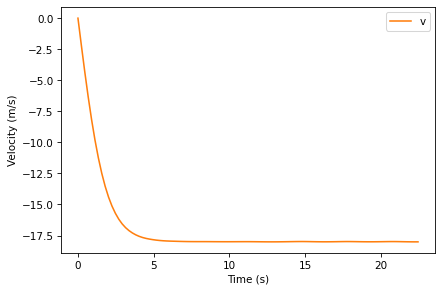

In [17]:
def plot_velocity(results):

    results.v.plot(color='C1', label='v')

    decorate(xlabel='Time (s)',
             ylabel='Velocity (m/s)')

plot_velocity(results)

In [18]:
params = params.set(v_init=-30)
system2 = make_system(params)

In [19]:
results2, details2 = run_solve_ivp(system2, slope_func,
                                 events=event_func)
details2.message

'A termination event occurred.'

In [20]:
t_sidewalk = results2.index[-1]
t_sidewalk

20.635183673114156

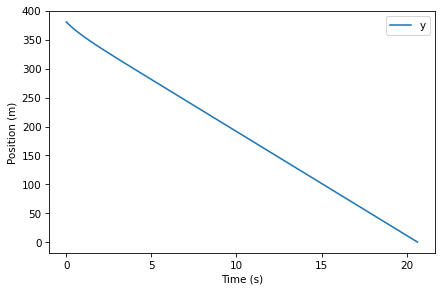

In [21]:
plot_position(results2)

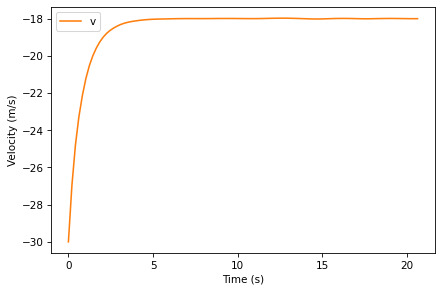

In [22]:
plot_velocity(results2)

In [23]:
params_quarter = params.set(mass = 0.0057,diameter = 0.024,flight_time = 19.1, )

In [24]:
system3 = make_system(params_quarter)

In [25]:
results3, details3 = run_solve_ivp(system3, slope_func,
                                   events=event_func)
details3.message

'A termination event occurred.'

In [26]:
t_sidewalk = results3.index[-1]
t_sidewalk

20.635183673114057

In [27]:
def error_func(guess, params):
    print(guess)
    params = params.set(v_term=guess)
    system = make_system(params)
    results, details = run_solve_ivp(system, slope_func,
                                     events=event_func)
    t_sidewalk = results.index[-1]
    error = t_sidewalk - params.flight_time
    return error

In [28]:
v_guess1 = 18
error_func(v_guess1, params_quarter)

18


1.5351836731140551

In [29]:
v_guess2 = 22
error_func(v_guess2, params_quarter)

22


-2.1591256962719925

In [30]:
res = root_scalar(error_func, params_quarter,
                  bracket=[v_guess1, v_guess2])

18
18.0
22.0
19.66221452468036
19.475274945870474
19.45967387499707
19.46064685869182


In [31]:
v_term = res.root
v_term

19.45967387499707

In [32]:
system4 = make_system(params_quarter.set(v_term=res.root))
system4.C_d

0.54345826868176

**MODIFICATON**

Certainly! Let's set up a simple simulation in Python to explore the motion of an object (let's say a ball) thrown upwards with an initial velocity greater than its terminal velocity. We'll use the scipy.integrate.solve_ivp function for numerical integration. The key aspects of the simulation will involve setting up the equations of motion considering gravity and air resistance.

In [33]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [34]:
g = 9.81  # gravitational acceleration in m/s^2
C_d = 0.47  # drag coefficient for a sphere
rho = 1.225  # air density in kg/m^3
r = 0.05  # radius of the ball in meters
A = np.pi * r**2  # cross-sectional area in m^2
mass = 0.1  # mass of the ball in kg

v_terminal = np.sqrt((2 * mass * g) / (C_d * rho * A))  # terminal velocity
v_init = 1.2 * v_terminal  # initial velocity upwards


In [35]:
def model(t, y):
    h, v = y
    F_d = 0.5 * C_d * rho * A * v**2  # drag force
    dvdt = -g - np.sign(v) * F_d / mass
    dhdt = v
    return [dhdt, dvdt]


In [36]:
h0 = 0  # initial height
y0 = [h0, v_init]  # initial condition vector
t_span = [0, 30]  # time span of the simulation
sol = solve_ivp(model, t_span, y0, max_step=0.1)


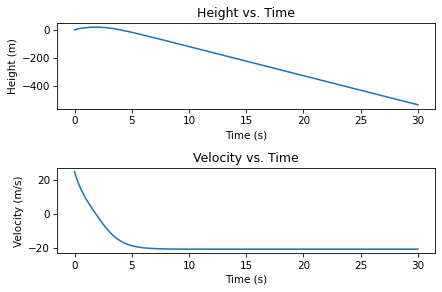

In [37]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0])
plt.title('Height vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')

plt.subplot(2, 1, 2)
plt.plot(sol.t, sol.y[1])
plt.title('Velocity vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.tight_layout()
plt.show()


Outcome:
The height vs. time graph shows the ball rising, reaching a peak, and then falling back down.
The velocity vs. time graph shows the ball slowing down as it rises, then speeding up as it falls, potentially reaching a steady terminal velocity on the way down.